## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:** Predict purchase amount

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

## Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the training dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

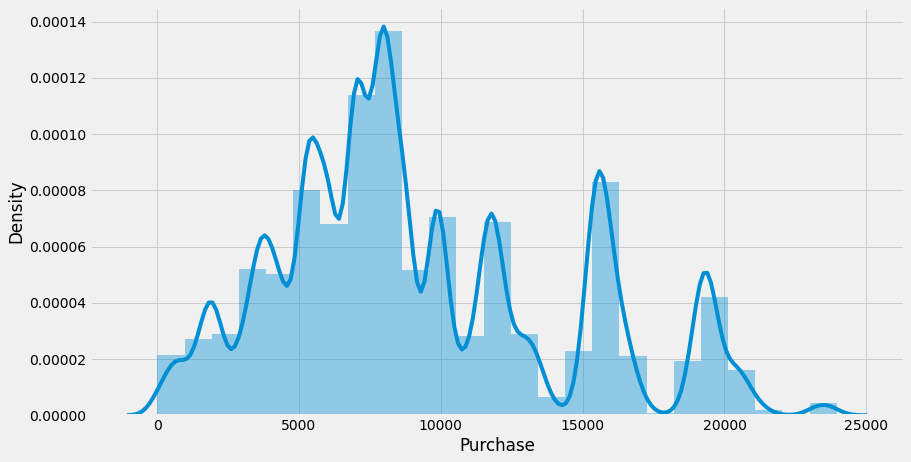

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

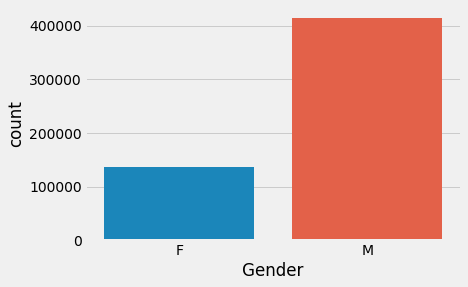

In [8]:
# distribution of numeric variables
sns.countplot(df['Gender'])

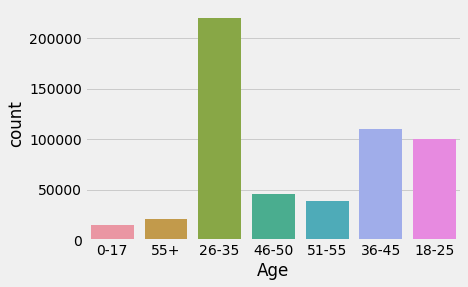

In [9]:
sns.countplot(df['Age'])

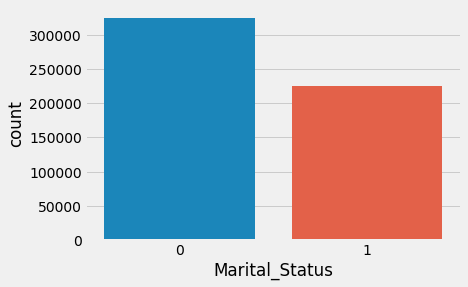

In [10]:
sns.countplot(df['Marital_Status'])

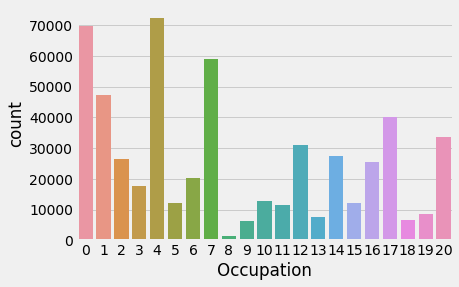

In [11]:
sns.countplot(df['Occupation'])

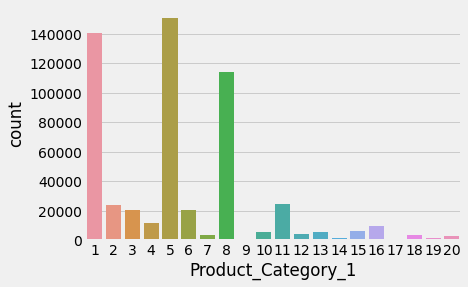

In [12]:
sns.countplot(df['Product_Category_1'])

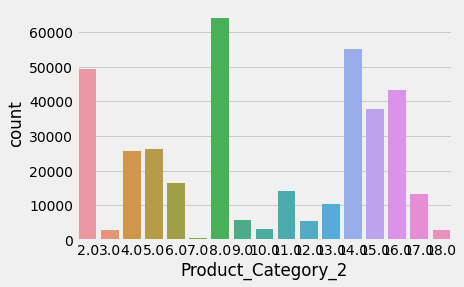

In [13]:
sns.countplot(df['Product_Category_2'])

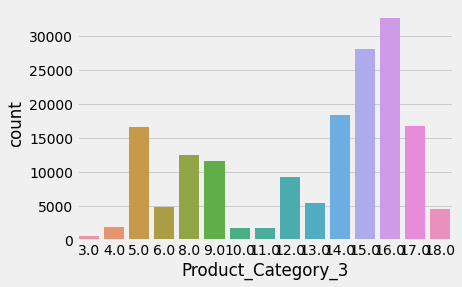

In [14]:
sns.countplot(df['Product_Category_3'])

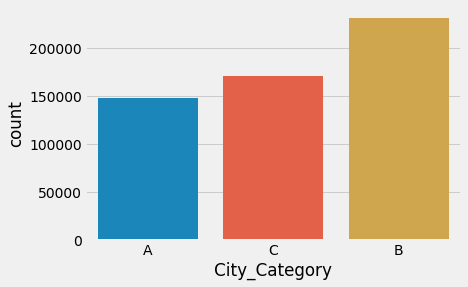

In [15]:
sns.countplot(df['City_Category'])

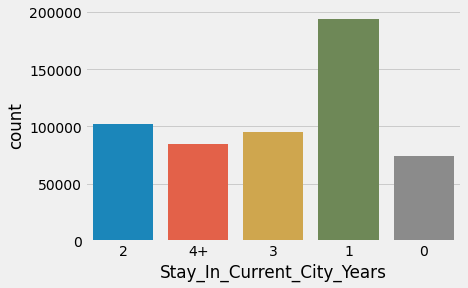

In [16]:
sns.countplot(df['Stay_In_Current_City_Years'])

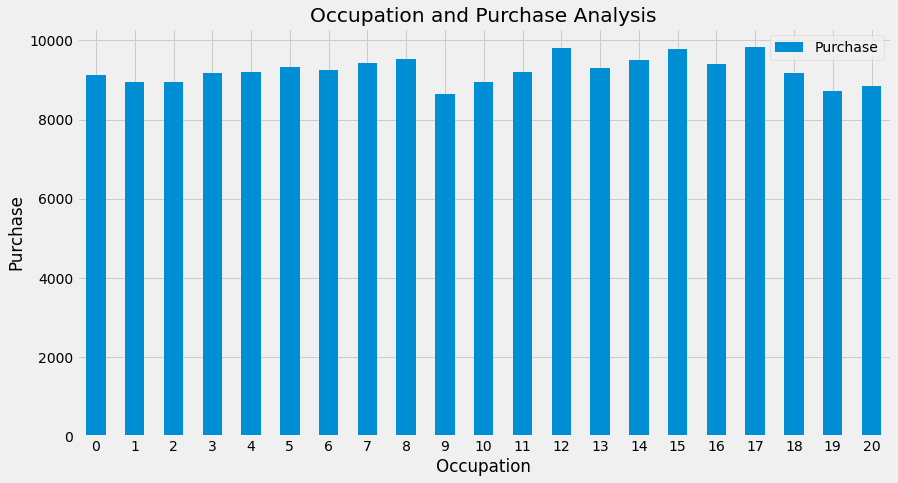

In [17]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

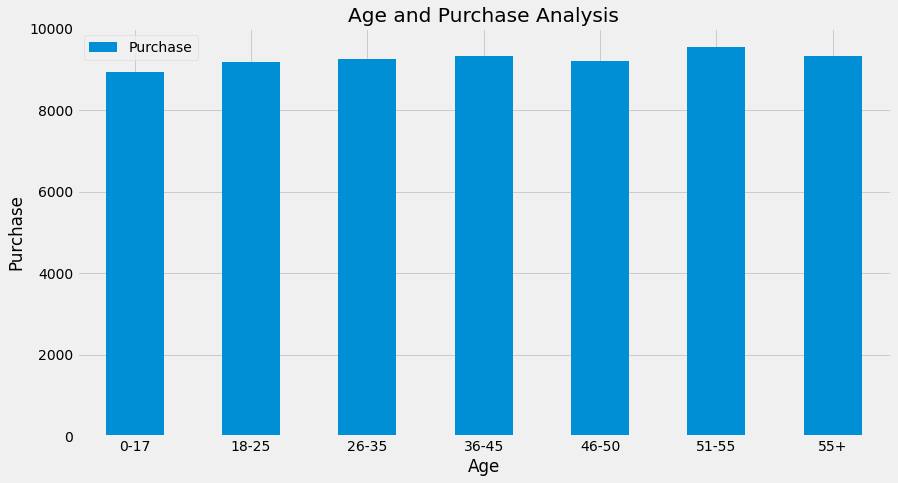

In [18]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

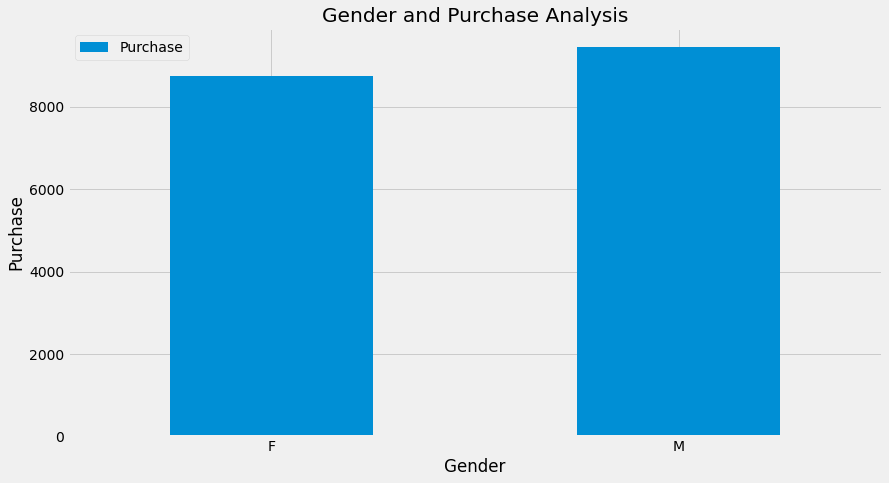

In [19]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [48]:
def simple_bar_plot(data, title = None):
  data.plot("bar", title = title)
  pass

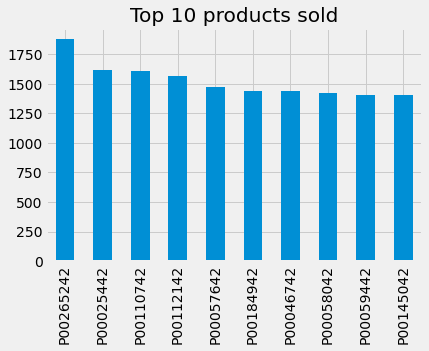

In [51]:
a = df["Product_ID"].value_counts(sort=True)[:10]
a.plot(kind = 'bar', title = "Top 10 products sold")

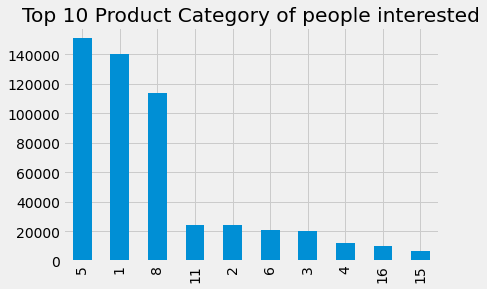

In [52]:
a = df["Product_Category_1"].value_counts(sort=True)[:10]
a.plot(kind = 'bar', title = "Top 10 Product Category of people interested")

## Preprocessing the training dataset

In [52]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [53]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype("float32")
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

**One Hot Encoding**

In [54]:
#df.drop(['User_ID','Product_ID'], axis=1,inplace=True)
df['Age']=(df['Age'].str.strip('+'))
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype(float))

#Dummy Variables:
df = pd.get_dummies(df, columns=['Age','City_Category','Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  float64
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float32
 7   Product_Category_3          550068 non-null  float32
 8   Purchase                    550068 non-null  int64  
 9   Age_0-17                    550068 non-null  uint8  
 10  Age_18-25                   550068 non-null  uint8  
 11  Age_26-35                   550068 non-null  uint8  
 12  Age_36-45                   550068 non-null  uint8  
 13  Age_46-50     

In [55]:
df

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M
0,1000001,P00069042,10,2.0,0,3,0.0,0.0,8370,1,0,0,0,0,0,0,1,0,0,1,0
1,1000001,P00248942,10,2.0,0,1,6.0,14.0,15200,1,0,0,0,0,0,0,1,0,0,1,0
2,1000001,P00087842,10,2.0,0,12,0.0,0.0,1422,1,0,0,0,0,0,0,1,0,0,1,0
3,1000001,P00085442,10,2.0,0,12,14.0,0.0,1057,1,0,0,0,0,0,0,1,0,0,1,0
4,1000002,P00285442,16,4.0,0,8,0.0,0.0,7969,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1.0,1,20,0.0,0.0,368,0,0,0,0,0,1,0,0,1,0,0,1
550064,1006035,P00375436,1,3.0,0,20,0.0,0.0,371,0,0,1,0,0,0,0,0,0,1,1,0
550065,1006036,P00375436,15,4.0,1,20,0.0,0.0,137,0,0,1,0,0,0,0,0,1,0,1,0
550066,1006038,P00375436,1,2.0,0,20,0.0,0.0,365,0,0,0,0,0,0,1,0,0,1,1,0


**Creating new variables**

In [56]:
avg_purchase_per_product=pd.DataFrame(df.groupby(['Product_ID'])['Purchase'].mean())
avg_purchase_per_product.reset_index(inplace=True)
avg_purchase_per_user=pd.DataFrame(df.groupby(['User_ID'])['Purchase'].mean())
avg_purchase_per_user.reset_index(inplace=True)

In [57]:
def create_var(data):
    product_count=pd.DataFrame(data['Product_ID'].value_counts())

    product_count.reset_index(inplace=True)
    product_count=product_count.rename(columns={'index':'Product_ID','Product_ID':'Product_count'})

    data['avg_purchase_per_product']=data['Product_ID'].map(avg_purchase_per_product.set_index('Product_ID')['Purchase'])
    data['product_count']=data['Product_ID'].map(product_count.set_index('Product_ID')['Product_count'])
    data['avg_purchase_per_user']=data['User_ID'].map(avg_purchase_per_user.set_index('User_ID')['Purchase'])

    conditions = [
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] == 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] != 0)]
    choices = [1, 2, 3]
    data['Category_Count'] = np.select(conditions, choices, default=0)
    
    return data

In [58]:
df = create_var(df)
df

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000001,P00069042,10,2.0,0,3,0.0,0.0,8370,1,0,0,0,0,0,0,1,0,0,1,0,11870.863436,227,9545.514286,1
1,1000001,P00248942,10,2.0,0,1,6.0,14.0,15200,1,0,0,0,0,0,0,1,0,0,1,0,16304.030981,581,9545.514286,3
2,1000001,P00087842,10,2.0,0,12,0.0,0.0,1422,1,0,0,0,0,0,0,1,0,0,1,0,1237.892157,102,9545.514286,1
3,1000001,P00085442,10,2.0,0,12,14.0,0.0,1057,1,0,0,0,0,0,0,1,0,0,1,0,1455.140762,341,9545.514286,2
4,1000002,P00285442,16,4.0,0,8,0.0,0.0,7969,0,0,0,0,0,0,1,0,0,1,0,1,7692.763547,203,10525.610390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1.0,1,20,0.0,0.0,368,0,0,0,0,0,1,0,0,1,0,0,1,374.930705,837,13940.083333,1
550064,1006035,P00375436,1,3.0,0,20,0.0,0.0,371,0,0,1,0,0,0,0,0,0,1,1,0,374.266585,814,6293.717105,1
550065,1006036,P00375436,15,4.0,1,20,0.0,0.0,137,0,0,1,0,0,0,0,0,1,0,1,0,374.266585,814,8007.894942,1
550066,1006038,P00375436,1,2.0,0,20,0.0,0.0,365,0,0,0,0,0,0,1,0,0,1,1,0,374.266585,814,7502.833333,1


## Coorelation Matrix



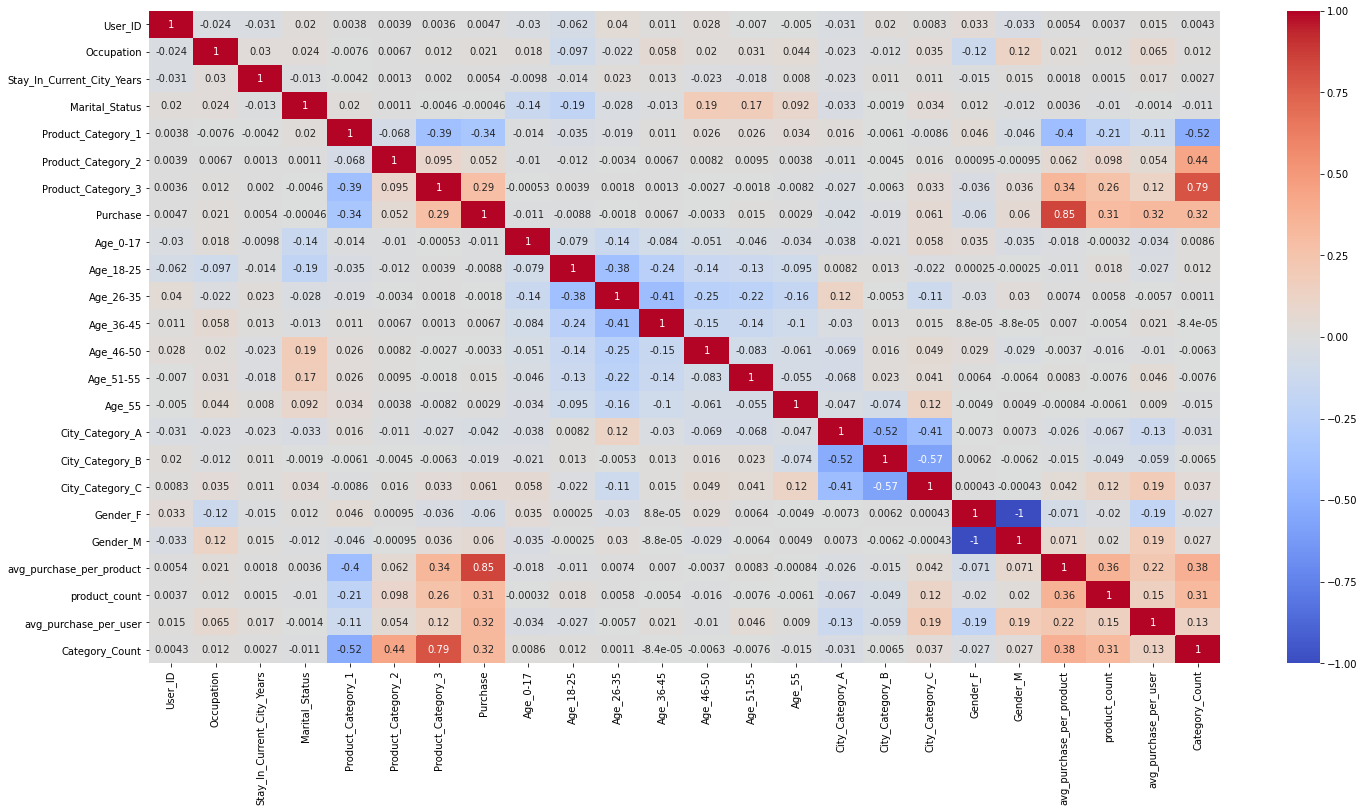

In [59]:
corr = df.corr()
plt.figure(figsize=(24,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [60]:
df.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000001,P00069042,10,2.0,0,3,0.0,0.0,8370,1,0,0,0,0,0,0,1,0,0,1,0,11870.863436,227,9545.514286,1
1,1000001,P00248942,10,2.0,0,1,6.0,14.0,15200,1,0,0,0,0,0,0,1,0,0,1,0,16304.030981,581,9545.514286,3
2,1000001,P00087842,10,2.0,0,12,0.0,0.0,1422,1,0,0,0,0,0,0,1,0,0,1,0,1237.892157,102,9545.514286,1
3,1000001,P00085442,10,2.0,0,12,14.0,0.0,1057,1,0,0,0,0,0,0,1,0,0,1,0,1455.140762,341,9545.514286,2
4,1000002,P00285442,16,4.0,0,8,0.0,0.0,7969,0,0,0,0,0,0,1,0,0,1,0,1,7692.763547,203,10525.610390,1


In [61]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

## Model Training

In [74]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
sc = StandardScaler()
scaler = sc.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [75]:
from xgboost.sklearn import XGBRegressor
xgb=XGBRegressor(n_estimators=500,learning_rate=0.2,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7, n_jobs = -1)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE =', rmse)
print('R2 =', r2)

[06:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE = 2462.000913312638
R2 = 0.7587596478876104


**Loading and Predicting on the testing data**

In [76]:
data = pd.read_csv("test.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [77]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(0).astype("float32")
data['Product_Category_3'] = data['Product_Category_3'].fillna(0).astype("float32")

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          233599 non-null  float32
 10  Product_Category_3          233599 non-null  float32
dtypes: float32(2), int64(4), object(5)
memory usage: 17.8+ MB


In [79]:
data['Age']=(data['Age'].str.strip('+'))
data['Stay_In_Current_City_Years']=(data['Stay_In_Current_City_Years'].str.strip('+').astype(float))

#Dummy Variables:
data = pd.get_dummies(data, columns=['Age','City_Category','Gender'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  float64
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  int64  
 6   Product_Category_2          233599 non-null  float32
 7   Product_Category_3          233599 non-null  float32
 8   Age_0-17                    233599 non-null  uint8  
 9   Age_18-25                   233599 non-null  uint8  
 10  Age_26-35                   233599 non-null  uint8  
 11  Age_36-45                   233599 non-null  uint8  
 12  Age_46-50                   233599 non-null  uint8  
 13  Age_51-55     

In [80]:
data = create_var(data)

In [81]:
testing_data = data.drop(columns=['User_ID', 'Product_ID'])
testing_data.columns

Index(['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Gender_F', 'Gender_M', 'avg_purchase_per_product',
       'product_count', 'avg_purchase_per_user', 'Category_Count'],
      dtype='object')

In [82]:
a = testing_data.to_numpy()
a = scaler.transform(a)

In [84]:
ans = xgb.predict(a)

In [85]:
submission4 = pd.DataFrame()
submission4['Purchase'] = ans
submission4['User_ID'] = data['User_ID']
submission4['Product_ID'] = data['Product_ID']
submission4.to_csv('submission7.csv', index = False)

# **Other Machine Learning Models**



In [88]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    sc = StandardScaler()
    scaler = sc.fit(X)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test) 
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 2567.481132883882
CV Score: 2555.228241689195


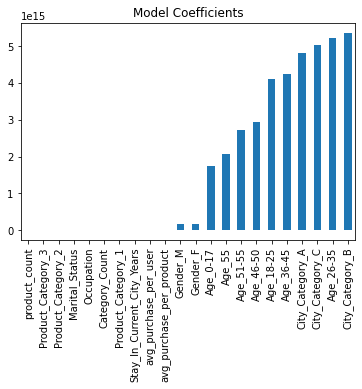

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3549.089267059473
CV Score: 3556.5957505843985


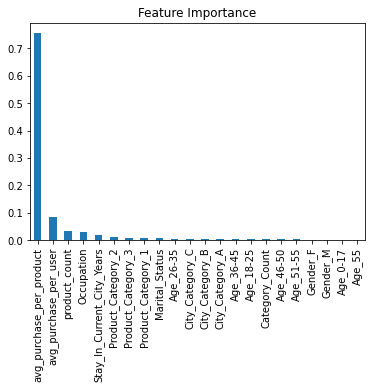

In [90]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 2542.967537946822
CV Score: 2532.292383213638


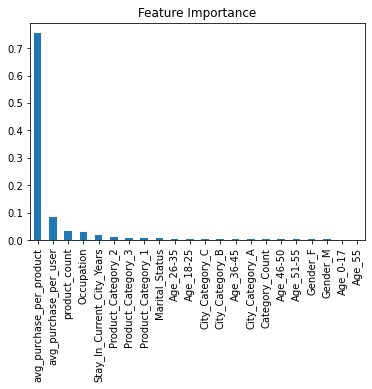

In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')